# Introduction
Our dataset comes from Myntra sales data scraped from the web. It comprises details such as brand name, product description, price, marked price (MRP),
discount percentage, ratings, and number of ratings. As we dive in, we will uncover insights about pricing strategies and customer satisfaction.



In [19]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Set a consistent style
sns.set(style='whitegrid', palette='muted', color_codes=True)

# For model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print('All libraries imported and settings configured.')

All libraries imported and settings configured.


# Data Loading and Exploration
We load the dataset myntra_dataset_ByScraping.csv from the specified path. This short exploration will help us to understand the structure of our data and the type of variables present.

In [32]:
# Load the dataset
data_path = r'D:\Users\VISHAL BHATNAGAR\anaconda3\all datasets\Myntra sales\myntra_dataset_ByScraping.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Display the first few rows of the dataframe
print('Dataset Head:')
display(df.head())

# Display summary information
print('\nDataset Info:')
display(df.info())

# Basic descriptive statistics for numeric columns
print('\nDescriptive Statistics:')
display(df.describe())

Dataset Head:


,brand_name,pants_description,price,MRP,discount_percent,ratings,number_of_ratings
0,WROGN,Men Loose Fit Cotton Jeans,1374.0,2499.0,0.45,4.2,57.0
1,Flying Machine,Men Slim Fit Jeans,1829.0,2999.0,0.39,4.6,5.0
2,Roadster,Men Pure Cotton Jeans,974.0,2499.0,0.61,3.6,1100.0
3,Bene Kleed,Relaxed Fit Denim Jeans,873.0,2299.0,0.62,4.0,4800.0
4,Levis,Men 511 Slim Fit Jeans,1478.0,2899.0,0.49,4.3,264.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52120 entries, 0 to 52119
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand_name         52120 non-null  object 
 1   pants_description  52120 non-null  object 
 2   price              52120 non-null  float64
 3   MRP                52120 non-null  float64
 4   discount_percent   52120 non-null  float64
 5   ratings            52120 non-null  float64
 6   number_of_ratings  52120 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


None


Descriptive Statistics:


,price,MRP,discount_percent,ratings,number_of_ratings
count,52120.000000,52120.000000,52120.000000,52120.000000,52120.000000
mean,1594.515445,3180.398438,1.648256,3.997794,91.568937
std,1495.972325,2201.883218,4.687529,0.420404,433.918513
min,337.000000,499.000000,0.020000,1.000000,5.000000
25%,989.000000,2499.000000,0.400000,3.800000,16.000000
50%,1439.000000,2999.000000,0.500000,4.000000,35.000000
75%,1829.000000,3499.000000,0.630000,4.200000,74.000000
max,54000.000000,72000.000000,64.000000,5.000000,30700.000000


# Data Cleaning and Preprocessing
In this section we check for missing values, correct data types, and any potential anomalies in the data. Although our data appears to be clean, it is a good practice to review and pre-process the information before deeper analysis.

Note: Sometimes other users might encounter encoding issues or missing values; hence we ensure robust cleaning procedures.

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# If any missing values exist, decide on a strategy
# For this dataset, we assume minimal missing values and fill them where appropriate
df.fillna({
    'brand_name': 'Unknown',
    'pants_description': 'No Description',
    'price': df['price'].mean(),
    'MRP': df['MRP'].mean(),
    'discount_percent': 0,
    'ratings': df['ratings'].median(),
    'number_of_ratings': 0
}, inplace=True)


# Convert data types if necessary (in our case numeric columns are already properly typed)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['MRP'] = pd.to_numeric(df['MRP'], errors='coerce')
df['discount_percent'] = pd.to_numeric(df['discount_percent'], errors='coerce')
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['number_of_ratings'] = pd.to_numeric(df['number_of_ratings'], errors='coerce')

# Check again for any remaining missing values
print('\nMissing values after cleaning:')
print(df.isnull().sum())

Missing values in each column:
brand_name           0
pants_description    0
price                0
MRP                  0
discount_percent     0
ratings              0
number_of_ratings    0
dtype: int64

Missing values after cleaning:
brand_name           0
pants_description    0
price                0
MRP                  0
discount_percent     0
ratings              0
number_of_ratings    0
dtype: int64


# Exploratory Data Analysis
This section delves into understanding the distribution and relationships in the data using various visualizations. We will explore numerical correlations, distributions of key features, and categorical counts. Enjoy exploring the colorful patterns and relationships between variables.

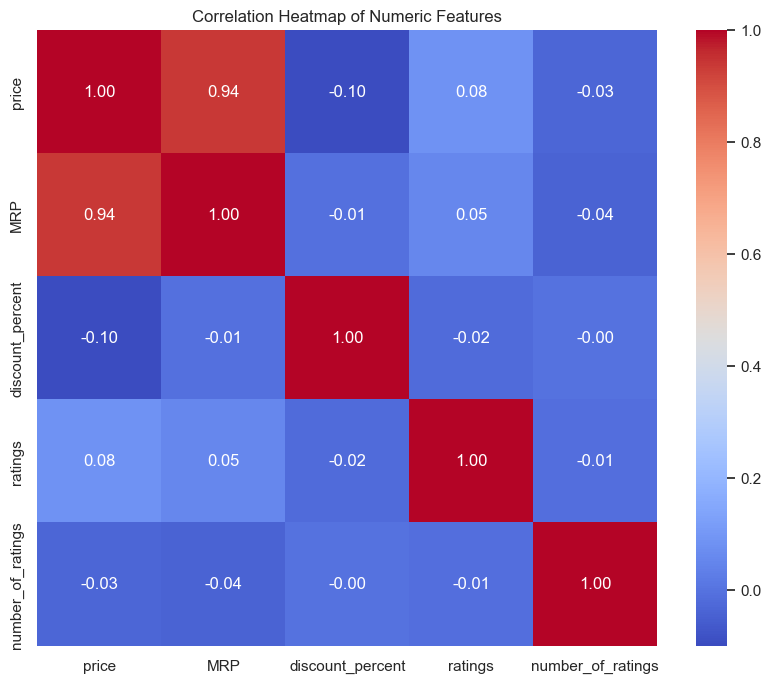

In [25]:
# Correlation heatmap for numeric features (only if there are at least 4 numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    correlation = numeric_df.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

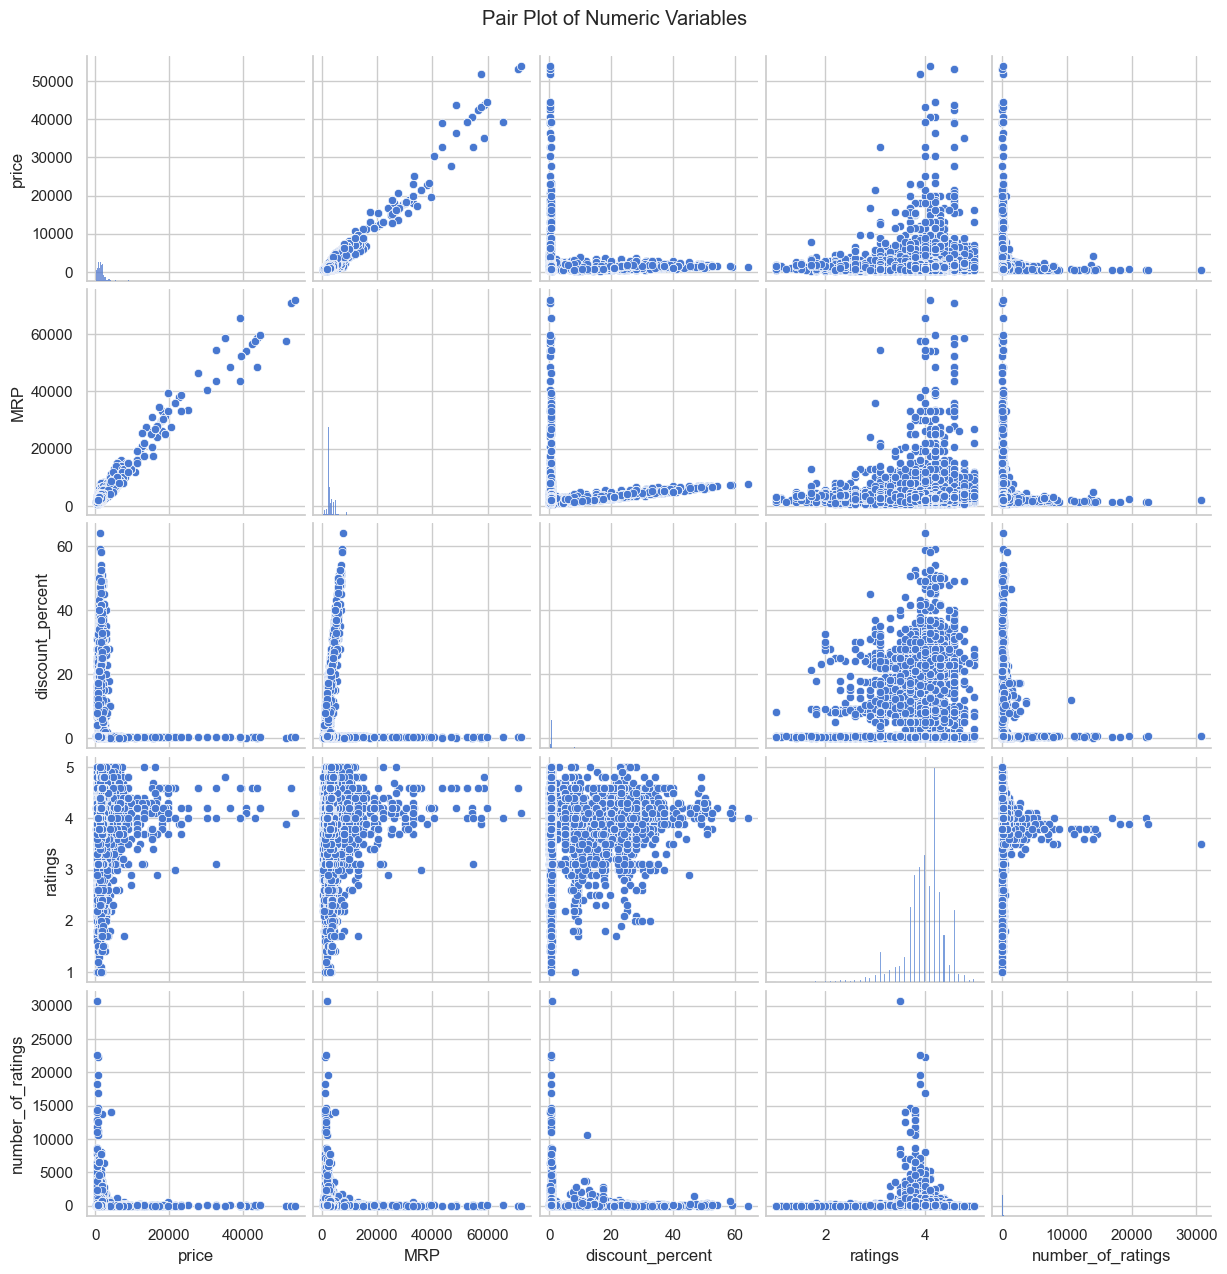

In [26]:
# Pair plot to observe pairwise relationships
sns.pairplot(numeric_df.dropna())
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

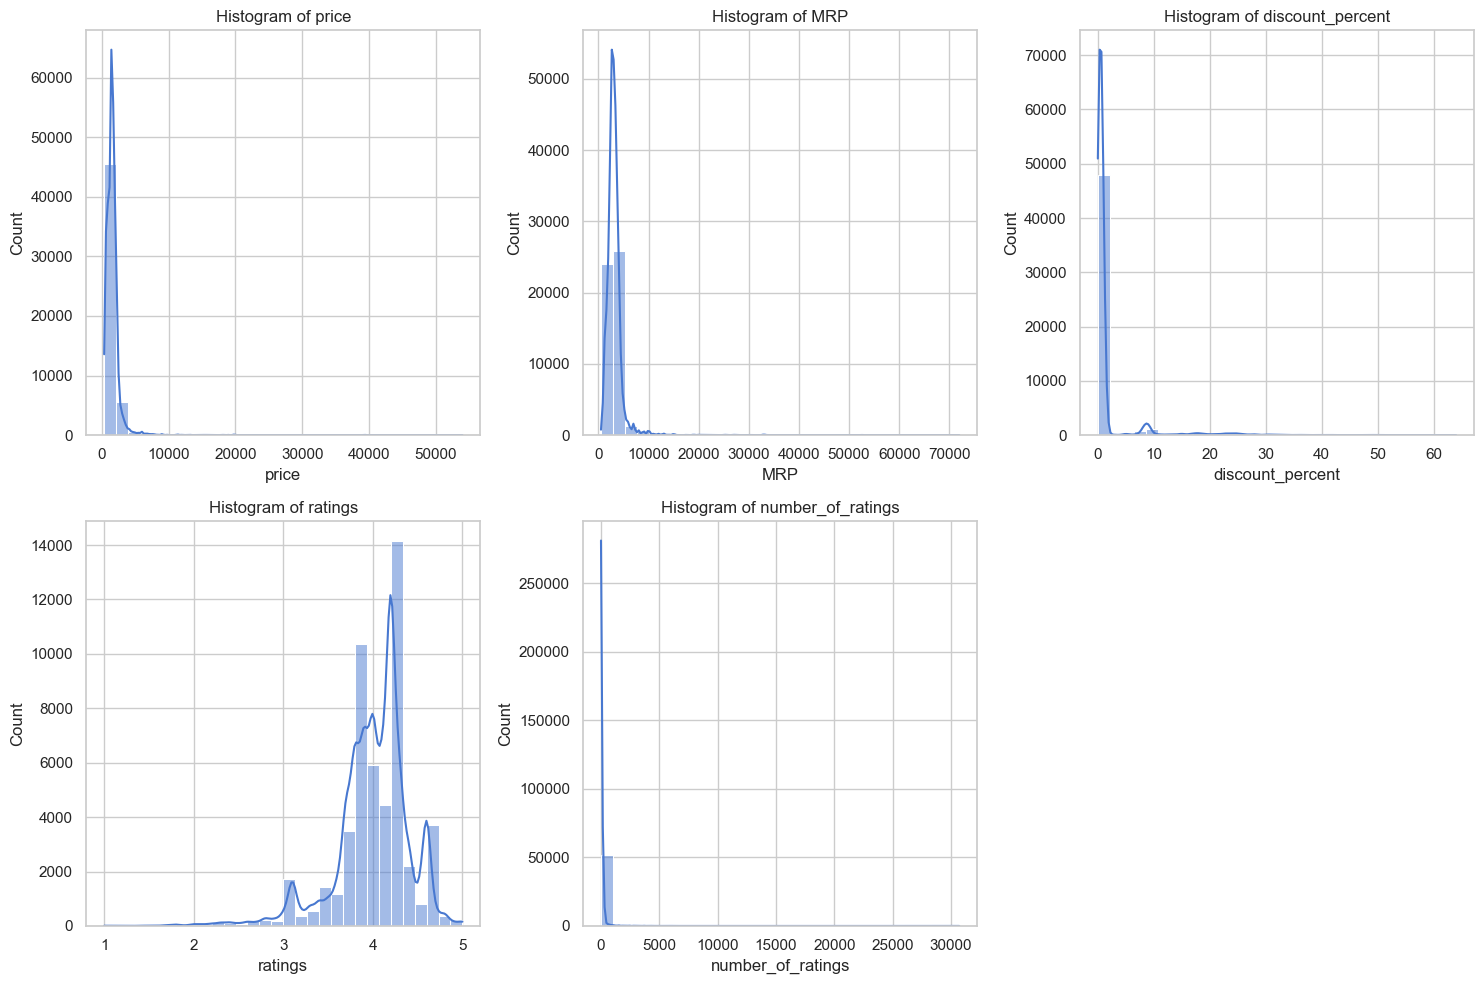

In [27]:
# Plot histograms for each numeric feature
numeric_columns = numeric_df.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

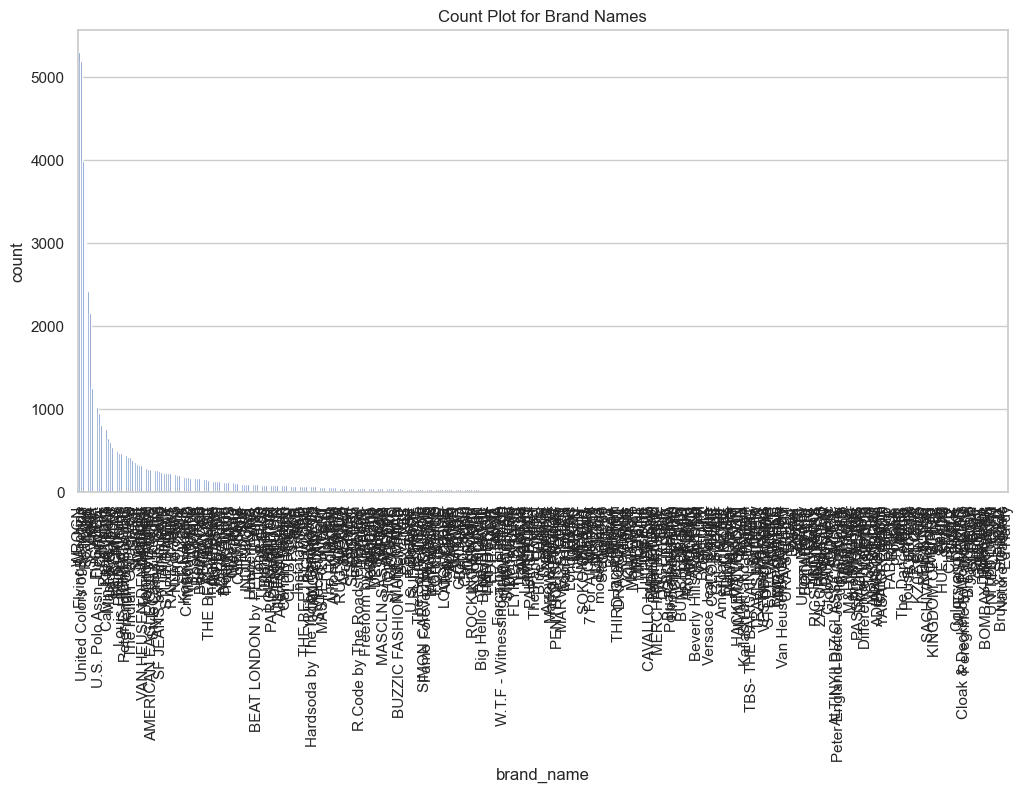

In [28]:
# Count plot (pie chart alternative) for categorical variable: brand_name
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='brand_name', order=df['brand_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count Plot for Brand Names')
plt.show()

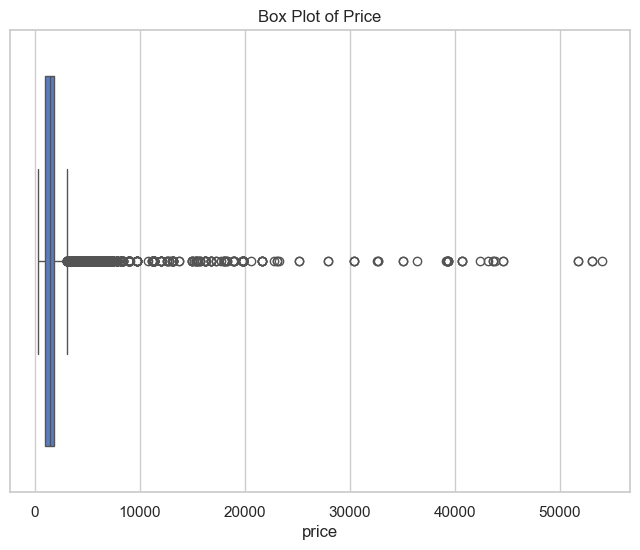

In [29]:
# Box plot for Price to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')
plt.show()

# Predictive Modeling
Next we build a simple predictive model. Given the intriguing relationships discovered, we explore whether the numeric features can predict product 
ratings. We cast this as a regression problem and use the linear regression model. The model is evaluated using metrics such as Mean Squared Error 
(MSE) and R² score.
Sometimes in real-life projects, our predictors might not perform as expected. In such cases, error analysis and trying more advanced techniques are 
the order of the day.

In [30]:
# Define features and target for regression
# We use price, MRP, discount_percent and number_of_ratings to predict ratings
features = ['price', 'MRP', 'discount_percent', 'number_of_ratings']
target = 'ratings'

X = df[features]
y = df[target]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Linear Regression Model Evaluation:')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')


Linear Regression Model Evaluation:
Mean Squared Error: 0.17
R2 Score: 0.01


# Conclusion
Our analysis of the Myntra sales dataset provided interesting insights into the dynamics between pricing, discounts, and customer ratings.The 
correlation and pair plots revealed several patterns that inspired the development of a linear regression model to predict product ratings.